#HW3 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

In [25]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(5):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')
  #from google.colab import files #google.colab only
  plt.savefig("3.png")
  #files.download("3.png") #google.colab only



In [26]:
def step(state, action):
    if state[0] == A_POS[0] and state[1] == A_POS[1]:
        return A_PRIME_POS, 10
    if state[0] == B_POS[0] and state[1] == B_POS[1]:
        return B_PRIME_POS, 5

    next_state = (state + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0

    return next_state, reward

In [27]:
WORLD_SIZE = 5
A_POS = np.array([0, 1])
A_PRIME_POS = np.array([4, 1])
B_POS = np.array([0, 3])
B_PRIME_POS = np.array([2, 3])
DISCOUNT = 0.9
# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]

In [30]:
def evaluateActionValue():
    q_value = rd.rand(WORLD_SIZE, WORLD_SIZE, len(ACTIONS))
    while True:
      # keeping iteratiing until convergence
      new_q_value = np.zeros(q_value.shape)
      for row in range(WORLD_SIZE):
        for col in range(WORLD_SIZE):
            for idx in range(len(ACTIONS)):
                next_state, reward = step([row, col], ACTIONS[idx])
                next_update_0, next_update_1 = next_state[0], next_state[1]
                # Remember to take the maximum from q_value
                new_q_value[row, col, idx] += reward + DISCOUNT * max(q_value[next_update_0, next_update_1])
      
      # optimal value function 
      
      if np.sum(np.abs(new_q_value - q_value)) < 1e-4:
        return new_q_value

      q_value = new_q_value

    return q_value

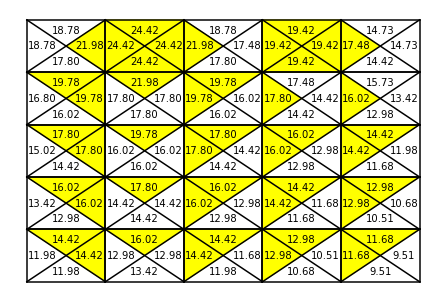

In [31]:
drawTable(evaluateActionValue())